<a href="https://www.kaggle.com/code/gracefarayola/medical-no-show?scriptVersionId=104161266" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Investigate a No-Show medical appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This projects aims at understanding why certain individuals show up for their medical appointments and why they don't show up. In the Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received columns true is depicted with the number 1 while false is depicted with the number 0. 
No in the No-show column means the patients showed up for their apppointment while yes means they did not show up for their appointment 

**Questions to ask**
<ul>
    <li>How many people shows up or not to their appointment</li>
    <li>What neighbourhood shows up the most or not?</li>
    <li>Does a gender show up more than another gender?</li>
    <li>What factors contributes to no show appointments</li>
    <li>is the age a factor?</li>
    <li>Is the gender a factor as who dosen't show?</li>
    
    
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
**In the General properties section, I did the following:**
<ul>
    <li>I read the data in</li>
    <li>I checked the data shape to ascertain the rows and the columns in the data set</li>
    <li>I checked the general information of the data using the info() method to 
        check the data column names and data types as well as the null values</li>
    <li>I checked if there was any duplicates in the dataset</li>
    <li>I went ahead to view the sum of duplicates</li>
    <li>I also dropped the duplicates</li>
    <li>I then checked the unique entries in the neighbourhood column of the dataset</li>
    <li>I took a count of the number of unique entries in the neighborhood columns</li>
    <li>I also checked the unique values in the gender column, this was 
        to ensure that the data collected was useful for both males and females</li>
    </ul>
    


### General Properties

Reading the data into a pandas dataframe

In [2]:
df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Investigating the rows and columns of the data as well as datatypes of the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above cell it shows that there are 110527 rows and 14 columns in the dataset.
I can also deduce that 4 columns are Floats, 8 columns are integers and 5 columns are objects

checking to see if there are any null values in the data set

In [4]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above cell shows that there are no null values in the data set

checking the data set to see if there are any duplicated values


In [5]:
df.duplicated().sum()

0

The above cell shows that there are no duplicates in the dataset so there would be no need to drop duplicates

In [6]:
def date(x):
    x=pd.to_datetime(x)
    return x



Changing the Schedule day column and the appointment day column into datetime data types using the date function created above

In [7]:
df["ScheduledDay"]=date(df["ScheduledDay"])
df["AppointmentDay"]=date(df["AppointmentDay"])

Checking the data types to ensure that both the scheduled day and the appointment day column has been changed into date time data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

the column above shows that the scheduled day and the appointment day coulumn has already been changed to date time data types

I dont think the patient id and appointment id would have any impact on whether the individual would show up for their appointment or not 

In [9]:
df.drop(columns=["PatientId","AppointmentID"], axis=1, inplace=True)

checking to see if both columns have been dropped

In [10]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


The above cell shows that the patient id and the appointment id has been dropped successfully

investigating the first appointment day

In [11]:
min(df.AppointmentDay)

Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

This shows that the first appointment day was April 2016

Investigating the first scheduled day

In [12]:
max(df.ScheduledDay)

Timestamp('2016-06-08 20:07:23+0000', tz='UTC')

The above cell output shows that the latest scheduled day was june 2016


I am trying to figure out the latest appointment day

In [13]:
max(df.AppointmentDay)

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

The latest appointment day is also June 2016

In [14]:
min(df.ScheduledDay)

Timestamp('2015-11-10 07:13:56+0000', tz='UTC')

The column names seem too long for me so in the next cell i would be renaming all the column names for my ease. I would be doing this by creating a list of the names of the columns and assigning this new list to df.columns
Gender- sex
ScheduledDay- sd	
AppointmentDay-ad	
Age-age
Neighbourhood-hood	
Scholarship-sch	
Hipertension-hyp	
Diabetes-dia	
Alcoholism-alc	
Handcap-hc	
SMS_received-sms	
No-show-no_show

In [15]:
columns=["sex", "sd", "ad", "age", "hood", "sch", "hyp", "dia", "alc", "hc", "sms", "no_show"]
df.columns=columns

The next cell is to check if the names of the columns has changed

In [16]:
df.head()

,sex,sd,ad,age,hood,sch,hyp,dia,alc,hc,sms,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the above cell, I can see that I have been able to change the names of the columns

I want to create a new column that contains the length time between the appointment date and the scheduled date

In [17]:
df["diff"]=df["ad"]-df["sd"]
df.head()

,sex,sd,ad,age,hood,sch,hyp,dia,alc,hc,sms,no_show,diff
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


From the above cell, I have created the column diff that shows the difference between the appointmemt date and the scheduled date

I dont think I would be using the sd and ad columns anymore so I would be dropping them

In [18]:
df.drop(columns=["sd","ad"], axis=1, inplace=True)

In [19]:
df.head(1)

,sex,age,hood,sch,hyp,dia,alc,hc,sms,no_show,diff
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52


From the above cell I have successfully dropped the sd and ad column

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: How many people in this dataset are male or females?

In [20]:
sex=df["sex"].value_counts()
sex

F    71840
M    38687
Name: sex, dtype: int64

There are 71840 females and 38687 males 

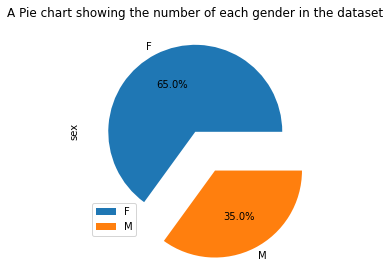

In [21]:
sex.plot(kind="pie", legend=True,autopct='%1.1f%%', explode=[0,0.5])
plt.title("A Pie chart showing the number of each gender in the dataset");

The above cell is a pie chart that shows that there  are more females in the data set than males. It also tells us that 35% of the entire population are males. Meaning that females are more than half of the data set 

## Question 2: How many times was there a no_show

    In the next cell I want see how many times was there a no_show in the data set

In [22]:
df["no_show"].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

**Recall:**  The yes means those hat didnt show up and No means those that showed up to their apppointment. We can see that about a quarter of the people in this dataset did nor show up to their appointment

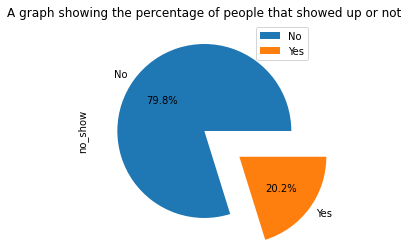

In [23]:
df["no_show"].value_counts().plot(kind="pie",legend=True,autopct='%1.1f%%', explode=[0,0.5])

plt.title("A graph showing the percentage of people that showed up or not");

The graph shows a visual representation that only 20.2% of the people actually failed to show up at their appointment

## Question 3: Does one gender show up more than the other 

In the next cell, I am trying to subset the dataframe, so that i can be able to visualise the various gender in the data set and there no_show status frequency

In [24]:
female_show= df.query("sex=='F'& no_show =='No'")
female_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57246 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   sex      57246 non-null  object         
 1   age      57246 non-null  int64          
 2   hood     57246 non-null  object         
 3   sch      57246 non-null  int64          
 4   hyp      57246 non-null  int64          
 5   dia      57246 non-null  int64          
 6   alc      57246 non-null  int64          
 7   hc       57246 non-null  int64          
 8   sms      57246 non-null  int64          
 9   no_show  57246 non-null  object         
 10  diff     57246 non-null  timedelta64[ns]
dtypes: int64(7), object(3), timedelta64[ns](1)
memory usage: 5.2+ MB


from the above i have been able to subset the data to contaon only information of women who showed up for their appointment and this leaves me with a datafram that contains 57246 rows and 11 columns which points to the fact that 57246 women showed up to their appointment

In [25]:
female_no_show=df.query("sex=='F'& no_show=='Yes'")
female_no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14594 entries, 6 to 110516
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   sex      14594 non-null  object         
 1   age      14594 non-null  int64          
 2   hood     14594 non-null  object         
 3   sch      14594 non-null  int64          
 4   hyp      14594 non-null  int64          
 5   dia      14594 non-null  int64          
 6   alc      14594 non-null  int64          
 7   hc       14594 non-null  int64          
 8   sms      14594 non-null  int64          
 9   no_show  14594 non-null  object         
 10  diff     14594 non-null  timedelta64[ns]
dtypes: int64(7), object(3), timedelta64[ns](1)
memory usage: 1.3+ MB


in the above cell I subsetted the dataframe to contain only females that did not show up at their appointment. The dataframe contains 14594 rows which points to the fact that 71840 women that were in the dataset only 14594 females did not show up to their appointment 

In [26]:
male_show= df.query("sex=='M'& no_show =='No'")
male_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30962 entries, 1 to 110513
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   sex      30962 non-null  object         
 1   age      30962 non-null  int64          
 2   hood     30962 non-null  object         
 3   sch      30962 non-null  int64          
 4   hyp      30962 non-null  int64          
 5   dia      30962 non-null  int64          
 6   alc      30962 non-null  int64          
 7   hc       30962 non-null  int64          
 8   sms      30962 non-null  int64          
 9   no_show  30962 non-null  object         
 10  diff     30962 non-null  timedelta64[ns]
dtypes: int64(7), object(3), timedelta64[ns](1)
memory usage: 2.8+ MB


In the above cell, I created a dataframe that shows only the males that showed up for their appointment and i can see that 30962 showed up for their appointment 

In [27]:
male_no_show=df.query("sex=='M'& no_show=='Yes'")
male_no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 11 to 110515
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   sex      7725 non-null   object         
 1   age      7725 non-null   int64          
 2   hood     7725 non-null   object         
 3   sch      7725 non-null   int64          
 4   hyp      7725 non-null   int64          
 5   dia      7725 non-null   int64          
 6   alc      7725 non-null   int64          
 7   hc       7725 non-null   int64          
 8   sms      7725 non-null   int64          
 9   no_show  7725 non-null   object         
 10  diff     7725 non-null   timedelta64[ns]
dtypes: int64(7), object(3), timedelta64[ns](1)
memory usage: 724.2+ KB


In the above cell, I created a dataframe that shows only the males that did not show up for their appointment and i can see that 7725 did not show up for their appointment 

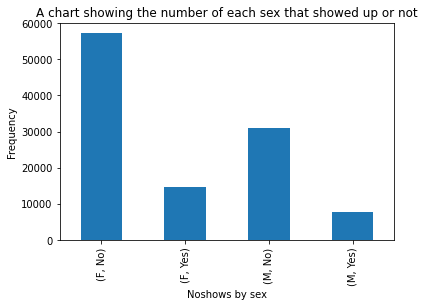

In [28]:
show_counts=df.groupby("sex")["no_show"].value_counts()
show_counts.plot(kind="bar")
plt.xlabel("Noshows by sex")
plt.ylabel("Frequency")
plt.title("A chart showing the number of each sex that showed up or not");

From the bar chart above it is clear that more female did not show up than males and more females showed up than males. This maybe because more women are in the dat set than men

## Question 4: What's the distribution of the age in the dataset 

I want see how many age is in the dataset and if there is any need to group them together

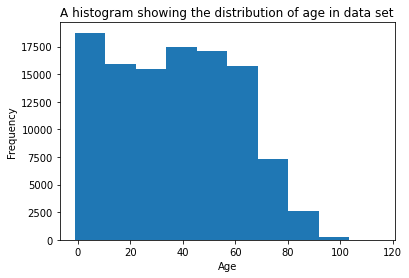

In [29]:
df["age"].plot(kind="hist")
plt.xlabel("Age")
plt.title("A histogram showing the distribution of age in data set");

From the histogram I can see that there is a large spread age in the data set so I would go ahead to dedscribe the age column so that I properly group the ages in the data 

In [30]:
df["age"].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

from the results of the describe i can see clearly see that there are some children that are not up to a year of age and we have those that are as old as 115 years old. Considering that the mean and the median are both the same I can say that this a normal distribution and even though there are people in the dataset are there dosent seem to be outliers considerng that it doesnt affect the distribution of the dataset. 

Firstly, I would create a bar chart after grouping the data using the percentile ranges so that I can see visually how many people are in each age group

In [31]:
bins=[-1,18,37,55,115]
names= ["Children","Youths","Older", "Senior"]
df["age_grp"]= pd.cut(df["age"], bins, labels=names)
df.head()

,sex,age,hood,sch,hyp,dia,alc,hc,sms,no_show,diff,age_grp
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,Senior
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,Senior
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,Senior
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,Children
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,Senior


From the above cell, I have alredy created a new column in the dataset that groups the difeernt ages in te data set 

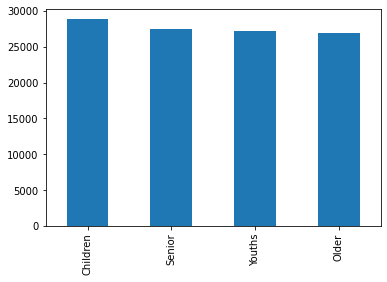

In [32]:
df["age_grp"].value_counts().plot(kind="bar");

From this chart I can  see that there are more slighlty more children in the data set than any other age group

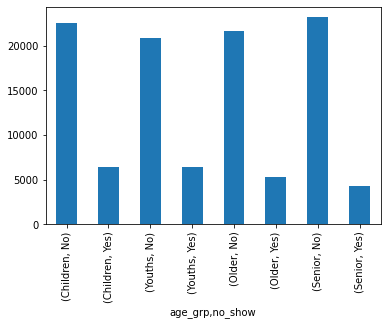

In [33]:
age_grp_counts=df.groupby("age_grp")["no_show"].value_counts()
age_grp_counts.plot(kind="bar");

Those in the children age group seemed to not show up he most for their appointmnet while those in the senior age_grp have less cases of those that did not show up for their appointments

## Question 5 How many people came from each neighborhood

In the next cell I want to see how many People came from each neighborhood

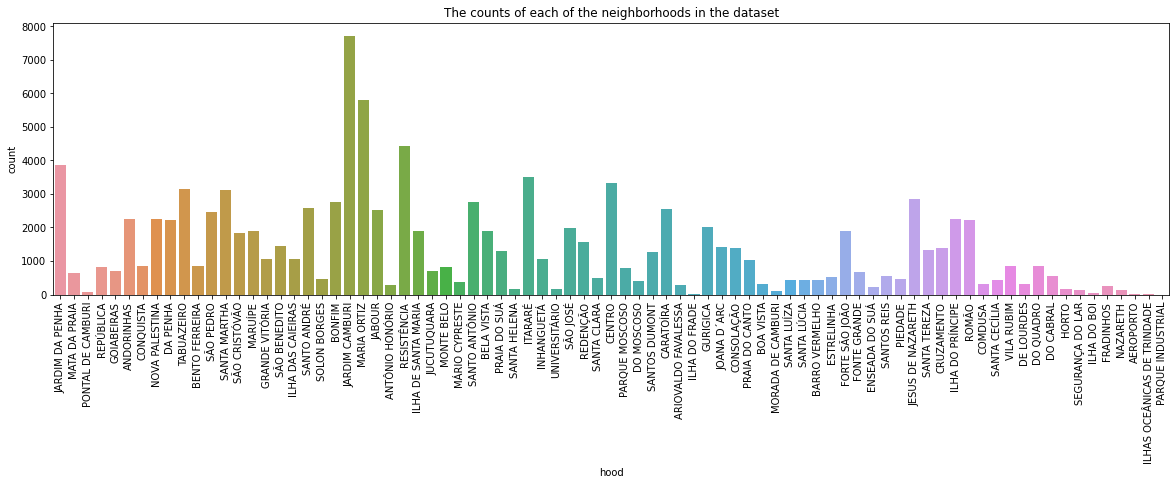

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(x="hood", data=df)
plt.xticks(rotation=90)
plt.title("The counts of each of the neighborhoods in the dataset");

The count plot shows clearly that the Jardin Camburi neighborhood has the highest number of patients

## Question 6: How many people from each neighborhood showed up or not for their appointment

I am trying to figure out which of the neighborhoods had the highest number of no shows. For this reason, I had to subset the dataframe to reflect only patients that did not show up for their appointments. 

In [35]:
df_no_show=df.query('no_show=="Yes"')
hood_no_show =df_no_show.groupby("hood")["no_show"].value_counts()
hood_no_show.describe()

count      80.000000
mean      278.987500
std       278.000751
min         1.000000
25%        75.000000
50%       184.500000
75%       428.250000
max      1465.000000
Name: no_show, dtype: float64

After subsetting the dataframe i tried to describe the new datafram and i noticed that all the neighborhoods had a case of no_shows and there was a neighborhood that has as high as 1465 cases. I went ahead to visualize in the next cell

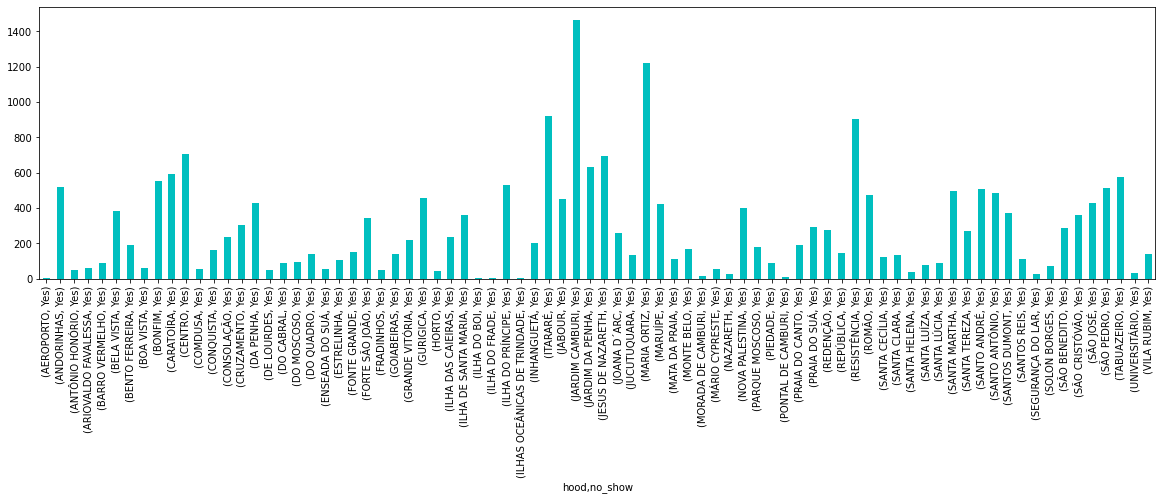

In [36]:
plt.figure(figsize=(20,5))
hood_no_show.plot(kind="bar", color="c");

From the above visualization, I can see that Neighborhoods that has high people that participated also high number of people that did not shpow up

## Question 7: Did those with or without scholarships show up or not

In the cells that follow I want to see if having a scholarship would make them show up for their appointment

To achieve the above question I would be focusing on the data set of only those that did not show up since those set of the people are my concern. I would use the data set df_no_show that I already created when i was working on question 6

I would be look at the head of the df_no_show data frame 

In [37]:
df_no_show.head()

,sex,age,hood,sch,hyp,dia,alc,hc,sms,no_show,diff,age_grp
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48,Youths
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02,Older
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2 days 15:15:48,Youths
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes,0 days 14:31:03,Older
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1 days 16:08:46,Youths


From the head of the data frame that I just read in, I can see that all the columns I would like to work with  are still there. Most importantly, this data is for only those that did not show up for their appointment.

In [38]:
sch_no_show =df_no_show.groupby("sch")["no_show"].value_counts()


in the above cell, I have already grouped the data by the scholarship column. In the next cell, I would go ahead to visualize.

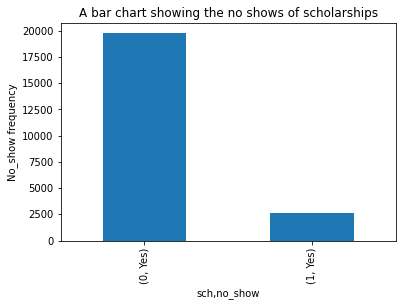

In [39]:
sch_no_show.plot(kind="bar")
plt.ylabel("No_show frequency")
plt.title("A bar chart showing the no shows of scholarships");

REcall that true is depicted with the number 1 while false is depicted with the number 0 in the scholarship column. From the above visulization, I can say that more people without scholarship showed up for their appointment than people with scholarship 

## Question 8: Are other factors like scholarship, Alcoholism, being handicap, hypertension and sms recieved are responsible for the no_shows

In [40]:
factors_False=df_no_show.query("sch==0 & hyp==0 & dia==0 & alc==0 & hc==0& sms==0")
factors_True=df_no_show.query("sch==1 & hyp==1 & dia==1 & alc==1 & hc==1& sms==1")

The above cell, I sliced the data into those factors that were 0 and 1

In [41]:
factors_False.describe()

,age,sch,hyp,dia,alc,hc,sms,diff
count,8645.000000,8645.0,8645.0,8645.0,8645.0,8645.0,8645.0,8645
mean,28.728976,0.0,0.0,0.0,0.0,0.0,0.0,12 days 16:37:31.730942741
std,20.400167,0.0,0.0,0.0,0.0,0.0,0.0,15 days 14:19:55.210099164
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-7 days +10:10:40
25%,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,1 days 08:46:32
50%,26.000000,0.0,0.0,0.0,0.0,0.0,0.0,6 days 12:24:02
75%,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,20 days 09:55:48
max,95.000000,0.0,0.0,0.0,0.0,0.0,0.0,161 days 09:54:25


After I described the data, I can see that Those that were false all through had about 8465 cases of no show

In [42]:
factors_True.describe()

,age,sch,hyp,dia,alc,hc,sms,diff
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


THose that were true for all had no case of no_show

I went ahead to begin the process for visualization by firstly groupby all the factors of interest column

In [43]:
all_factor_no_show= df_no_show.groupby(["sch","hyp","dia","alc","hc","sms"])["no_show"].value_counts()

In the above cell, I have grouped the dataset and created a new dataset named all_factor_no_show and I described the dataset in the next cell

In [44]:
all_factor_no_show.describe()

count      64.000000
mean      348.734375
std      1378.959192
min         1.000000
25%         1.000000
50%        12.000000
75%        76.000000
max      8645.000000
Name: no_show, dtype: float64

From the description, I can see that irrespective of the other factors combination at least there was still a case of no_show

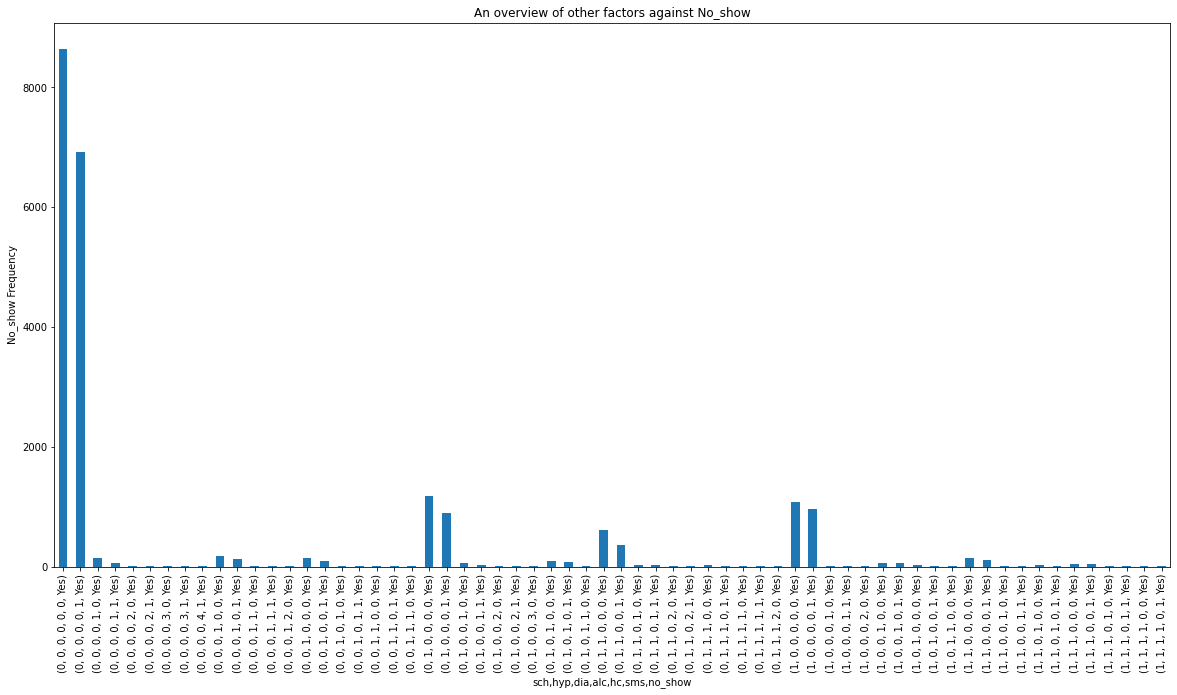

In [45]:
plt.figure(figsize=(20,10))
all_factor_no_show.plot(kind="bar")
plt.ylabel("No_show Frequency")
plt.title("An overview of other factors against No_show");

In the above cell, I visualized the all_factor_no_show and I can see clearly that in cases where the scholarship, hypertension, diabetes, alcoholism, handicap score, sms recieved are all 0 which implies false, the cases of No_show is the highest  

<a id='conclusions'></a>
## Conclusions

#### Results
<ul>
    <li>More people generally show up for their appointment</li>
    <li>About 20 neighbourhoods out of all the neighbordhood had high number of no-shows</li>
    <li>More females book for appointments than males</li>
    <li>those that have scholarship, hypertension, diabetes, alocoholism, 
        scored 1 for handcap, recieved sms all showed up for ther appointment</li>
    
    
</ul>


#### Limitations
<ul>
    <li>There is no feedback from those that didn't attend on why they didn't</li>
    <li>There is no data on those that attended on each indidual income level as that could be a cause of no_show</li>
    <li>There is no chharacteristic of the neighbourhood</li>
    <li>There is no weather condition for each of the days to make us draw inference on why they some people didn't show up</li>
    
</ul>